In [3]:
from keras.preprocessing import image

In [5]:
train_dir = '../data/train'

In [7]:
def read_img(imgpath, size):
    img = image.load_img(imgpath, target_size=size)
    img = image.img_to_array(img)
    return img

In [10]:
import glob
import random
image_paths = glob.glob('../data/train/*/*.jpg')
random.shuffle(image_paths)
image_paths[:10]

['../data/train/irish_terrier/09d462e2ad4d8c51d1a8430577891d8a.jpg',
 '../data/train/toy_terrier/52c9ab0f6d9f27daaf3641f86c019cae.jpg',
 '../data/train/shetland_sheepdog/fbd70c8820a6fbcd21242284baa8ba27.jpg',
 '../data/train/border_collie/a4dcc34cf079e1d7312b8375c715bdd4.jpg',
 '../data/train/affenpinscher/905a5a1957e65d2fb2ec199eedfd3dea.jpg',
 '../data/train/irish_setter/b2100c289c13d12ffd4161716f2bb646.jpg',
 '../data/train/brittany_spaniel/efd68fb69d154ed0ff2dfea8f782f0d3.jpg',
 '../data/train/afghan_hound/9cde15dd34bbf752d6ac654295938a1e.jpg',
 '../data/train/norwegian_elkhound/e5afb48f945656686984a28974cfca73.jpg',
 '../data/train/west_highland_white_terrier/0a70f64352edfef4c82c22015f0e3a20.jpg']

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [13]:
model = ResNet50(weights='imagenet')

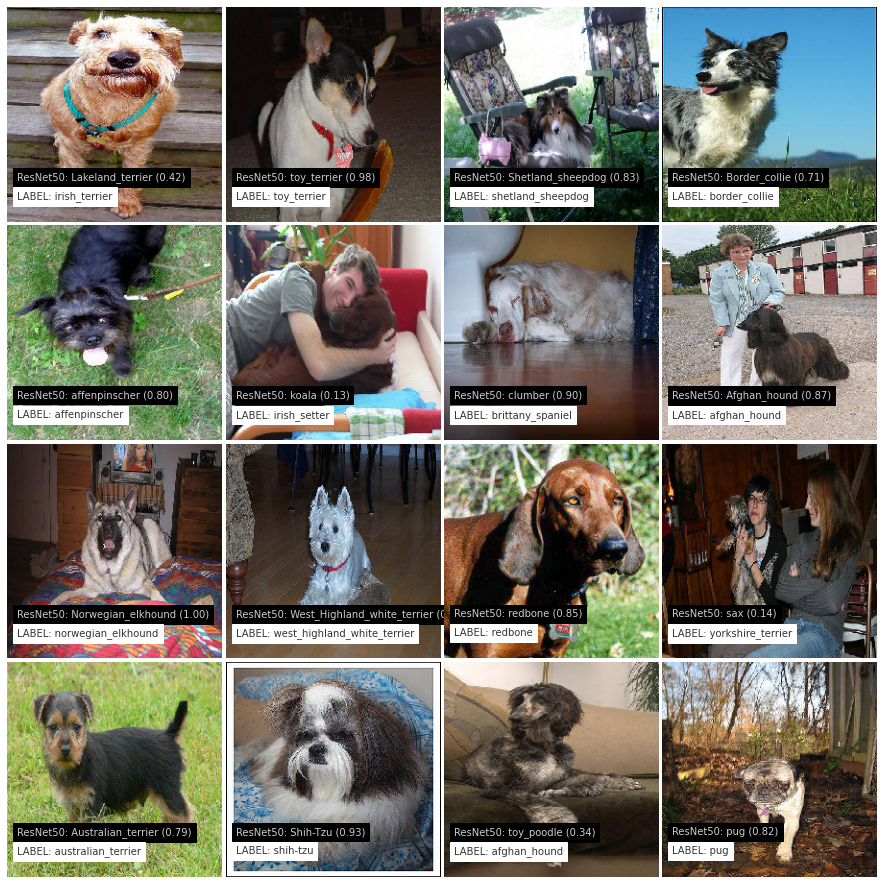

In [32]:
fig = plt.figure(1, figsize=(16, 16))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.05)
for i, imgpath in enumerate(image_paths[:16]):
    true_cls = imgpath.split('/')[3]

    ax = grid[i]
    img = read_img(imgpath, (224, 224))
    ax.imshow(img / 255.)
    
    # predict
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))  # (1, 224, 224, 3)
    preds = model.predict(x)  # (1, 1000)
    _, imagenet_class_name, prob = decode_predictions(preds, top=1)[0][0]
    ax.text(10, 180, 'ResNet50: {} ({:.2f})'.format(imagenet_class_name, prob), color='w', backgroundcolor='k', alpha=0.8)
    ax.text(10, 200, 'LABEL: {}'.format(true_cls), color='k', backgroundcolor='w', alpha=0.8)
    ax.axis('off')
plt.show()